## Questions:
1. Which field(s) has/have the strongest correlation with the “phishing” field?  Which field(s) has/have the weakest correlation with the “phishing” field?
2. Would you say that the URL length is a strong indicator of whether or not the URL is phishing?  Why or why not?  What metrics do you have to support your answer?
3. Would you say the number of redirections is a strong indicator of whether or not the URL is phishing?  Why or why not?  What metrics do you have to support your answer?
4. Based on your analysis, what advice would you give to others for deciphering whether or not a URL is phishing?


In [7]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [8]:
#Reading the data
df = pd.read_csv('web-page-phishing.csv')
df.head()

,url_length,n_dots,n_hypens,n_underline,n_slash,n_questionmark,n_equal,n_at,n_and,n_exclamation,n_space,n_tilde,n_comma,n_plus,n_asterisk,n_hastag,n_dollar,n_percent,n_redirection,phishing
0,37,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,77,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2,126,4,1,2,0,1,3,0,2,0,0,0,0,0,0,0,0,0,1,1
3,18,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,55,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


<Axes: >

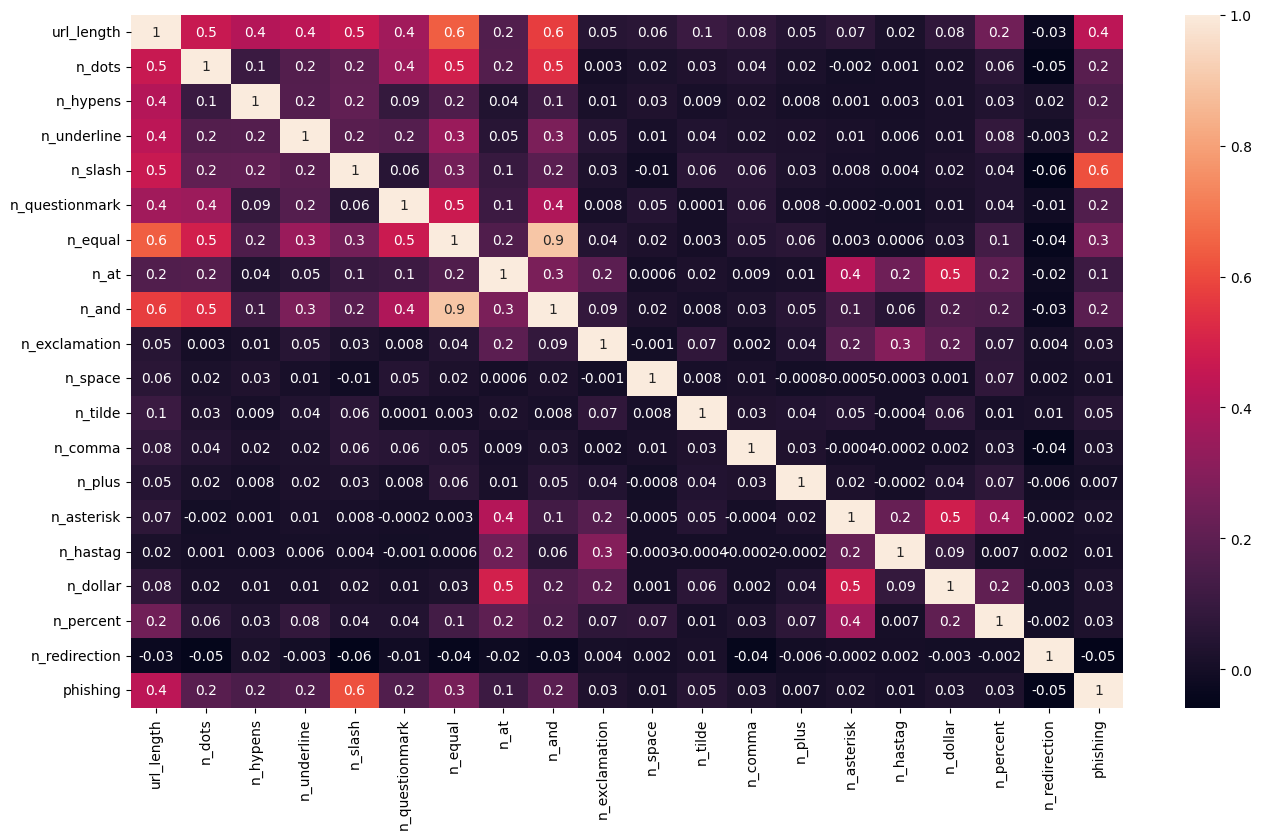

In [9]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),
           annot = True,
           fmt = '.1g')

## Interpretation

1. - Strongest Correlations with "phishing" would be "n_slash" because it has the highest correlation to the "phishing" field.
   - Weakest correlations with "phishing" would be "n_redirection" becasuse it has the lowest correlation to the "phishing" field.
2. The correlation between "url_length" and "phishing" is 0.4 which means that moderate positive correlation suggests that longer URLs tend to be associated with phishing sites more often.
3. The correlation between 'n_redirection' and 'phishing' is -0.05 which is near-zero and slightly negative correlation suggests that the number of redirections is nt a reliable indicator of whether a URL is phishing.
4. Based on the correlation:
    1. URLs with more slashes tend to have higher likelihood of being phishing sites.
    2. Even though URL length correlation is not higher than 'n_slash', longer URLs might warrant a closer look.
    3. The number of redicrection in URL does not significantly correlate with phishing likelihood.

## Detecting whether the URLs are phishing sites

In [10]:
df = df.dropna()

In [11]:
#drop columns
df = df.drop(columns = ['n_exclamation', 'n_space', 'n_tilde', 'n_comma', 'n_plus', 'n_asterisk', 'n_hastag', 'n_dollar', 'n_percent', 'n_redirection']
    )
df.head()

,url_length,n_dots,n_hypens,n_underline,n_slash,n_questionmark,n_equal,n_at,n_and,phishing
0,37,3,0,0,0,0,0,0,0,0
1,77,1,0,0,0,0,0,0,0,1
2,126,4,1,2,0,1,3,0,2,1
3,18,2,0,0,0,0,0,0,0,0
4,55,2,2,0,0,0,0,0,0,0


In [12]:
#Isolating X and Y
y = df.phishing
X = df.drop(columns='phishing')

In [13]:
import statsmodels.api as sm
X = sm.add_constant(X)
X.head()

,const,url_length,n_dots,n_hypens,n_underline,n_slash,n_questionmark,n_equal,n_at,n_and
0,1.0,37,3,0,0,0,0,0,0,0
1,1.0,77,1,0,0,0,0,0,0,0
2,1.0,126,4,1,2,0,1,3,0,2
3,1.0,18,2,0,0,0,0,0,0,0
4,1.0,55,2,2,0,0,0,0,0,0


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   random_state = 1502,
                                                   test_size = 0.2)

In [15]:
model = sm.Logit(y_train, X_train).fit()

print(model.summary())

Optimization terminated successfully.
         Current function value: 0.347590
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:               phishing   No. Observations:                80061
Model:                          Logit   Df Residuals:                    80051
Method:                           MLE   Df Model:                            9
Date:                Sat, 08 Jun 2024   Pseudo R-squ.:                  0.4694
Time:                        15:34:16   Log-Likelihood:                -27828.
converged:                       True   LL-Null:                       -52451.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -2.7165      0.030    -89.915      0.000      -2.776      -2.657
url_length      

Based on the summary, only n_equal field has the highest p-value which could be considered for removal because it is not a significant predictor and could be considered for removal.

In [17]:
prediction = model.predict(X_test)
prediction = np.where(prediction > 0.5, 1, 0)
print(prediction)

[1 0 0 ... 0 0 0]


In [18]:
from sklearn.metrics import classification_report

print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89     12718
           1       0.87      0.71      0.78      7298

    accuracy                           0.85     20016
   macro avg       0.86      0.82      0.83     20016
weighted avg       0.85      0.85      0.85     20016



The accuracy would be 85% without removing n_equal

## Without n_equal

In [22]:
#Isolating X and Y
y = df.phishing
X = df.drop(columns= ['phishing', 'n_equal'])

In [23]:
X = sm.add_constant(X)
X.head()

,const,url_length,n_dots,n_hypens,n_underline,n_slash,n_questionmark,n_at,n_and
0,1.0,37,3,0,0,0,0,0,0
1,1.0,77,1,0,0,0,0,0,0
2,1.0,126,4,1,2,0,1,0,2
3,1.0,18,2,0,0,0,0,0,0
4,1.0,55,2,2,0,0,0,0,0


In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   random_state = 1502,
                                                   test_size = 0.2)

In [25]:
model = sm.Logit(y_train, X_train).fit()

print(model.summary())

Optimization terminated successfully.
         Current function value: 0.347597
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:               phishing   No. Observations:                80061
Model:                          Logit   Df Residuals:                    80052
Method:                           MLE   Df Model:                            8
Date:                Sat, 08 Jun 2024   Pseudo R-squ.:                  0.4694
Time:                        15:54:11   Log-Likelihood:                -27829.
converged:                       True   LL-Null:                       -52451.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -2.7149      0.030    -90.060      0.000      -2.774      -2.656
url_length      

In [26]:
prediction = model.predict(X_test)
prediction = np.where(prediction > 0.5, 1, 0)
print(prediction)

[1 0 0 ... 0 0 0]


In [27]:
from sklearn.metrics import classification_report

print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89     12718
           1       0.87      0.71      0.78      7298

    accuracy                           0.85     20016
   macro avg       0.86      0.82      0.83     20016
weighted avg       0.85      0.85      0.85     20016



There is no significant change in the accuracy of the model